In [1]:
from packages import *

# Versuchsnachrechnung Zweifeldplatte

Der Abschluss der Modellanwendung bildet die Versuchsnachrechnung der Zweifeldplatte. Dazu ist das Kapitel gegliedert in den Versuchsbeschrieb, die Modellbildung des NLFE-Modells und die Resultate im Vergleich mit den Messgrössen.

## Versuchsbeschrieb

Die Zweifeldplatte entstammt aus @thoma_plattenversuche_2010. Es handelt sich um ein grossmasstäbliches Plattenexperiment. Dazu ist eine Stahlbetonplatte auf Ringbalken aufgelegt. Diese wiederum sind auf Mauerwerkswänden gelagert. Belastet ist die Platte mit Zugstangen, verankert im Aufspannboden an Hydraulikzylindern, in den jeweiligen Feldbereichen. Die Zugstangen weisen allesamnt die gleiche Kraftintensität auf. Eine Darstellung des Versuchsaufbaus zeigt die @fig-tho_aufbau_iso. 

![Isometrische Ansicht des Versuchsaufbaus, dargestellt sind die Platte, die Lagerung, die Krafteinleitung mittels den Zugstangen, ein Ringbalken unterhalb der Lagerung und Mauerwerkswände als Auflager der Ringbalken](../imgs/tho_aufbau_iso.svg){#fig-tho_aufbau_iso}

Der Grundriss und die Längsansicht zeigt die @fig-tho_aufbau_gr. Diese zeigt die Position der Gleitlager, die Position der Zugstangen und die Hauptabmessungen der Platte.

![Grundriss und Längsansicht, Lasteineinleitung, Lagerposition und die Plattenabmessungen sind vermasst](../imgs/tho_aufbau_gr.svg){#fig-tho_aufbau_gr}

Zum Monitoring des Körpers sind Wegaufnehmer unterhalb der Platte platziert. Die Anordnung ist in der @fig-tho_messung_gr gezeigt. Es wurde nach dem Einbringen des Körpers eine Nullmessung durchgeführt. Die gemessenen Verformungen entsprechen somit ausschliesslich der Deformation des Körpers durch die Belastung mit den Hydraulikzylindern.

![Position der Wegaufnehmer, vermasst auf Lagerachsen](../imgs/tho_messung_gr.svg){#fig-tho_messung_gr}

Der Versuch ist bis zum Bruch gefahren. Der Bruch erfolgt durch das Zerreissen der oberen Längsbewehrung im mittleren Auflagerberich.

### Berechnungsgrössen

Im Folgenden sind die Berechnungsgrössen zum Betonstahl, Beton und der Geometrie aufgelistet. Diese sind allesamt aus dem Versuchsbericht @thoma_plattenversuche_2010.

#### Betonstahl 

Die Platte ist kreuzweise mit einer Biegebewehrung mit Durchmesser 10 mm und einer 150 mm Teilung versehen. Dies gilt für die obere und untere Bewehrung. Am Rand sind Abschlussbügel verlegt. Zudem ist über dem Mittelauflager eine Querkraftbewehrung eingelegt, welche ein Querkraftversagen verhindert. Die @fig-tho_biegebewehrung_iso zeigt lediglich die Biegebewehrung.

![Biegebewehrung der Platte](../imgs/tho_biegebewehrung_iso.svg){#fig-tho_biegebewehrung_iso}

Daraus lassen sich die folgenden Parameter der Biegebewehrung ableiten:

In [2]:
diam_s = 10*un.mm

s = 150*un.mm
a_s = (diam_s**2*np.pi /4 /s).to(un.mm**2/un.m)

put_out(symbolic=True)

$$
\begin{aligned}
\oslash_{s}& = 10 \ \mathrm{mm} \quad & s& = 150 \ \mathrm{mm} \quad & a_{s}& = \frac{\oslash_{s}^{2} \cdot \pi}{4 \cdot s} = 523.6 \ \frac{\mathrm{mm}^{2}}{\mathrm{m}} \end{aligned}
$$

Die Eigenschaften des Betonstahls sind experimentell mit Zugversuchen bestimmt worden. Dabei sind die Angaben zu der Zugfestigkeit, Fliessgrenze, Elastizitätsmodul, Fliessdehnung und Bruchdehnung aus dem Bericht entnommen.

In [3]:
f_su = 558.6*un.N/un.mm**2
f_sy = 445.6*un.N/un.mm**2

E_s = 196.5*un.kN/un.mm**2

eps_sy = (f_sy / E_s).to(un.permille)
eps_su = 80.8*un.permille

put_out(symbolic=True)

$$
\begin{aligned}
f_{su}& = 558.6 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & f_{sy}& = 445.6 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & E_{s}& = 196.5 \ \frac{\mathrm{kN}}{\mathrm{mm}^{2}} \\ 
\varepsilon_{sy}& = \frac{f_{sy}}{E_{s}} = 2.27 \ \mathrm{‰} \quad & \varepsilon_{su}& = 80.8 \ \mathrm{‰} \quad &  
 \end{aligned}
$$

#### Beton 

Ebenso wurde der verwendete Beton experimentell untersucht. Im Bericht sind Angaben zu der Zylinderdruckfestigkeit und dem Elastizitätsmodul beschrieben. 

In [4]:
f_cc = 28.61*un.N/un.mm**2
E_c = 22.9*un.kN/un.mm**2
put_out(symbolic=True, rows = 3)

$$
\begin{aligned}
f_{cc}& = 28.61 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & E_{c}& = 22.9 \ \frac{\mathrm{kN}}{\mathrm{mm}^{2}} \quad &  
 \end{aligned}
$$

Basierend auf empirischen Ansätzen lässt sich eine Bauteilfestigkeit und die Betonzugfestigkeit bestimmen. Zudem ist die Annahme der Betonbruchstauchung aufgezeigt.

In [5]:

f_c = (2.7* f_cc.m**(2/3))*un.N/un.mm**2
f_ct = (0.3* f_cc.m**(2/3))*un.N/un.mm**2

eps_cu = 5.*un.permille

put_out(symbolic=True, rows = 3)

$$
\begin{aligned}
f_{c}& = 2.7 \cdot f_{cc}^{\frac{2}{3}} = 25.26 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & f_{ct}& = 0.3 \cdot f_{cc}^{\frac{2}{3}} = 2.81 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & \varepsilon_{cu}& = 5.0 \ \mathrm{‰} \end{aligned}
$$

#### Geometrie

Die Plattenstärke und die Bewehrungsüberdeckung sind folgend beschrieben.

In [6]:
h = 200*un.mm
c_nom = 20*un.mm

put_out()

$$
\begin{aligned}
h& = 200 \ \mathrm{mm} \quad & c_{nom}& = 20 \ \mathrm{mm} \quad &  
 \end{aligned}
$$

### Versuchsergebnisse

Aus dem Versuchsbericht geht die Traglast und ein Last-Verformungs-Diagramm hervor. Die Traglast beträgt 978 kN pro Feld. Dies entspricht der Summe der einzelnen Hydraulikzylindern pro Feld. Die folgende Beziehung beschreibt die Traglast pro Zylinder.

In [7]:
Q_u = 978*un.kN / 12

put_out(symbolic=True)

$$
\begin{aligned}
Q_{u}& = \frac{978}{12} = 81.5 \ \mathrm{kN} \quad &  \quad &  
 \end{aligned}
$$

Das Last-Verformungs-Diagramm zeigt die @fig-tho_mess_Q_w. Auf der Ordinate ist die Summe der Einzelkräfte pro Feld aufgezeigt und auf der Abszisse die Verformung der Feldmitte. Die exakte Position der Messung $V10$ ist in der @fig-tho_mess_Q_w gezeigt. 

In [8]:
DF_res_V10 = pd.read_csv('imgs/tho_res_V10.csv')


In [42]:
# | echo: false

fig_res_V10, ax_res_V10 = plt.subplots(figsize=(14/2.54,5.4/2.54))
ax_res_V10.plot(DF_res_V10.iloc[:,0], DF_res_V10.iloc[:,1], color="k")


# Set axis labels
ax_res_V10.set_ylabel(r"$F$ [kN]")
ax_res_V10.set_xlabel(r"$w_{V10}$ [mm]")


# fig_res_V10.savefig("imgs/tho_res_V10.jpg")
plt.close()

![Kraft-Verformungs-Diagramm an der Stelle $V10$, entnommen aus dem Versuchsbericht](../imgs/tho_mess_Q_w.svg){#fig-tho_mess_Q_w}

## NLFE-Modell

Dieser Abschnitt beschreibt die Modellbildung des nicht-linearen FE-Modells abschliessend. Im Vergleich mit der Anwendung an der Quadratplatte zeigt hier die Mikromodellbildung eine Herleitung einer ungerissenen und gerissenen Torsionssteifigkeit.

### Makromodellbildung

Die @fig-tho_rost_iso zeigt den Trägerrost mit den Auflagern, den Doppelgelenken, den starren Stäben, sowie sind an den Positionen der Zugstangen Einzellasten eingeführt. Die Abbildung ist lediglich schematisch, da eine deutlich feinere Elementlänge gewählt ist, als dargestellt. 


![Trägerrostmodell der Zweifeldplatte mit Einzellasten und Auflagern. Die Teilung des Rosts ist lediglich schematisch dargestellt.](../imgs/tho_rost_iso.svg){#fig-tho_rost_iso}

Die Elementlänge ist die folgende. Diese ist so gewählt, dass die Position der asymmetrisch angeordneten Einzellasten auf die Knoten zu liegen kommt. Zudem gibt es keine Längenunterschiede der Stäbe im Bereich des Mittelauflagers. Bei einer durchwegs gleichen Rostteilung sind die Gelenkbeziehungen für sämtliche Stabend- und Anfangsgelenke identisch. Dies reduziert den Modellierungsaufwand und vermindert Modellierungsfehler.


In [10]:
l_El = 0.10*un.m

put_out(symbolic=True)


$$
\begin{aligned}
l_{El}& = 0.1 \ \mathrm{m} \quad &  \quad &  
 \end{aligned}
$$

Die Knotenlast ist grosszügig grösser als die Traglast gewählt.

In [11]:
Q_NLFE = 100 *un.kN
put_out(symbolic=True)

$$
\begin{aligned}
Q_{NLFE}& = 100 \ \mathrm{kN} \quad &  \quad &  
 \end{aligned}
$$

### Mikromodellbildung

Die Mikromodellbildung zeigt zunächst die Vereinfachung der Materialeigenschaften. Danach folgt die Ermittlung des Biegeverhaltens und abschliessend die Beschreibung des Torsionsverhalten.

#### Baustoffe

Die Modellierung der Baustoffe beinhaltet die Spannungs-Dehnungs-Beziehung für den Betonstahl und für den Beton. Die @fig-tho_stress_strain_b500b zeigt das Verhalten für den Betonstahl B500B. Grau hinterlegt ist der Spannungs-Dehnungs-Verlauf aus den Zugproben. Der gewählte bilineare Verlauf zeigt deutliche Abweichungen zum experimentell ermittelten Verlauf im plastischen Bereich. Der Berechnungsaufwand mit einem bilinearen Verlauf ist händisch jedoch gut handhabbar.


In [12]:
DF_b500b = pd.read_csv('imgs/tho_stress_strain_b500b.csv')
DF_b500b['x'] = DF_b500b['x']/100



In [13]:
# | echo: false

stress_b500b_array = np.array([0, f_sy.m, f_su.m]) * un.MPa
strain_b500b_array = np.array([0, eps_sy.to(un.los), eps_su.to(un.los)])

fig_b500b, ax_b500b = plt.subplots()
ax_b500b.plot(strain_b500b_array, stress_b500b_array.to(un.MPa).m, color="k")
ax_b500b.plot(DF_b500b.iloc[:,0], DF_b500b.iloc[:,1], color="gray", alpha=0.5)

# Scientific Notation if needed
apply_scientific_notation(ax_b500b, stress_b500b_array.m)

# Set axis labels
ax_b500b.set_ylabel(r"$\sigma$ [N/mm$^2$]")
ax_b500b.set_xlabel(r"$\varepsilon_s$ [-]")

# Set limits
# ax_b500b.set_xlim(xmax=140 / 1000)
# ax_b500b.set_ylim(ymax=700)

# Show the plot
# plt.tight_layout()
plt.savefig("imgs/tho_stress_strain_b500b.svg")
plt.close()

![Spannungs-Dehnungs-Diagramm des Betonstahls B500B mit grau hinterlegten Versuchsdaten und die Idealisierung eines bilinearen Verlaufs](../imgs/tho_stress_strain_b500b.svg){#fig-tho_stress_strain_b500b}

Für den Beton gilt die Darstellung in @fig-tho_stress_strain_c. Das Spannungs-Dehnungs-Verhalten des Betons zeigt ein linear elastisches ideal plastisches Verhalten. Zudem zeigt die Darstellung die Berücksichtigung der Betonzugfestigkeit.

In [14]:
# | echo: false

stress_c_array = np.array([f_ct.m, -f_c.m, -f_c.m]) * un.MPa
strain_c_array = np.array([f_ct/E_c, -f_c/E_c, -eps_cu.to(un.los)])

fig_c, ax_c = plt.subplots()
ax_c.plot(strain_c_array, stress_c_array.to(un.MPa).m, color="k")

# Scientific Notation if needed
apply_scientific_notation(ax_c, stress_c_array.m)

# Set axis labels
ax_c.set_ylabel(r"$\sigma$ [N/mm$^2$]")
ax_c.set_xlabel(r"$\varepsilon_c$ [-]")

# Set limits
# ax_c.set_xlim(xmax=7 / 1000)
# ax_c.set_ylim(ymax=50)

# Show the plot
# plt.tight_layout()
plt.savefig("imgs/tho_stress_strain_c.svg")
plt.close()

![Spannungs-Dehnungs-Diagramm des Betons, linear elastischer - ideal plastischer Verlauf](../imgs/tho_stress_strain_c.svg){#fig-tho_stress_strain_c}

#### Biegeverhalten

Das Biegeverhalten ist definiert durch eine Momenten-Verdrehungs-Beziehung. Diese ist auf Grundlage der Momenten-Krümmungs-Beziehung zu ermitteln. Basierend auf den Modellen der Baustoffe kann der Querschnitt bei steigender Krümmung untersucht werden. Dies führt zu einem Momenten-Krümmungs-Diagramm. Der zu untersuchende Querschnitt ist in der @fig-tho_qs gezeigt.


![Plattenquerschnitt eines einzelnen Stabs](../imgs/tho_qs.svg){#fig-tho_qs}

Dabei gilt es eine Bauteilbreite $b_w$ zu bestimmen. Aufgrund der gleichen Teilung des Trägerrosts in globaler X und Y Richtung entspricht die Bauteilbreite des Querschnitts der Elementlänge.

In [15]:
b_w = l_El

put_out(symbolic=True)

$$
\begin{aligned}
b_{w}& = l_{El} = 0.1 \ \mathrm{m} \quad &  \quad &  
 \end{aligned}
$$

Der definierte Querschnitt ist bei steigender Krümmung zu untersuchen. Eine Approximation des Verhaltens wird nun aufgezeigt. Dazu betrachtet man zunächst den Zustand vor dem Reissen des Betons. Dargestellt ist dieser in der @fig-tho_qs_mr

![Querschnittsanalyse beim Reissen des Betons, Beton erreicht Zugfestigkeit, Betonstahlspannung ist vernachlässigt](../imgs/tho_qs_mr.svg)

Mittels Gleichgewicht der Kräfte lässt sich der Hebelarm der inneren Kräfte bestimmen, die Betondruckkraft, das Rissmoment und die entsprechende Krümmung.

In [16]:
z = h - 2/3 * h/2
F_c = (h/2 * f_ct * b_w *1/2).to(un.kN)
M_r = (F_c * z).to(un.kNm)

chi_r = (f_ct/E_c /(h/2)).to(1/un.km)

put_out(symbolic=True, evaluate=True, rows = 2)

$$
\begin{aligned}
z& = \frac{2 \cdot h}{3} = 133.33 \ \mathrm{mm} \quad & F_{c}& = \frac{b_{w} \cdot f_{ct} \cdot h}{4} = 14.03 \ \mathrm{kN} \\ 
M_{r}& = F_{c} \cdot z = 1.87 \ \mathrm{kNm} \quad & \chi_{r}& = \frac{2 \cdot f_{ct}}{E_{c} \cdot h} = 1.23 \ \frac{1}{\mathrm{km}} \end{aligned}
$$

Das Fliessen der Bewehrung zeigt den zweiten aussagekräftigen Punkt im Momenten-Krümmungs-Diagramm. Die Querschnittsanalyse dazu zeigt die @fig-tho_qs_my.


![Querschnittsanalyse beim Fliessen der Bewehrung, der Beton ist völlig elastisch](../imgs/tho_qs_my.svg){#fig-tho_qs_my}


Mit der Querschnittsfläche der Bewehrung lässt sich die Druckzonenhöhe bestimmen.

In [17]:
A_s = a_s*b_w
x = ((A_s*f_sy) / (f_c*b_w*1/2 )).to(un.mm)
put_out(symbolic=True, rows = 2)



$$
\begin{aligned}
A_{s}& = a_{s} \cdot b_{w} = 52.36 \ \mathrm{mm}^{2} \quad & x& = \frac{A_{s} \cdot f_{sy}}{f_{c} \cdot b_{w} \cdot 1 \cdot \frac{1}{2}} = 18.48 \ \mathrm{mm} \end{aligned}
$$

Zudem gilt es zu kontrollieren, ob sich der Beton im elastischen Zustand befindet. Dazu kann anhand der statischen Höhe und der Stahldehnung die Betondehnung und Betonspannung bestimmt werden.

In [18]:
d_apos = h - c_nom - diam_s / 2

eps_c = (f_sy / E_s  / (d_apos - x) * x).to(un.permille)
sigma_c = (eps_c * E_c).to(un.N/un.mm**2)
f_c

put_out(symbolic=True, rows = 2)


$$
\begin{aligned}
{d}'& = h - c_{nom} - \frac{\oslash_{s}}{2} = 175.0 \ \mathrm{mm} \quad & \varepsilon_{c}& = \frac{f_{sy} \cdot x}{E_{s} \cdot \left({d}' - x\right)} = 0.27 \ \mathrm{‰} \\ 
\sigma_{c}& = \varepsilon_{c} \cdot E_{c} = 6.13 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & f_{c}& = 2.7 \cdot f_{cc}^{\frac{2}{3}} = 25.26 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

Die Spannung bei der Randfaser ist deutlich kleiner als die Druckfestigkeit. Die Hypothese, dass der Beton vollständig elastisch ist, ist bewiesen.

In [19]:
z = d_apos - 1/3*x
F_s = (A_s * f_sy ).to(un.kN)
M_y = (F_s * z).to(un.kNm)
chi_y = (eps_sy /(d_apos-x)).to(1/un.km)

put_out(symbolic=True,rows=2, evaluate=True)

$$
\begin{aligned}
z& = {d}' - \frac{x}{3} = 168.84 \ \mathrm{mm} \quad & F_{s}& = A_{s} \cdot f_{sy} = 23.33 \ \mathrm{kN} \\ 
M_{y}& = F_{s} \cdot z = 3.94 \ \mathrm{kNm} \quad & \chi_{y}& = \frac{\varepsilon_{sy}}{{d}' - x} = 14.49 \ \frac{1}{\mathrm{km}} \end{aligned}
$$

Abschliessend lässt sich der Biegewiderstand bestimmen. Dem Beton wird ein vollständiges Plastifizieren vorausgesetzt. Dabei wird die Betonstahldehnung iterativ bestimmt, bis die Betondehnung der Betonbruchdehnung entspricht. Die @fig-tho_qs_mu zeigt den Querschnitt, die Dehnungsebene und die Spannungen des Zustands.

![Querschnittsanalyse, der Beton ist vollständig plastifiziert](../imgs/tho_qs_mu.svg){#fig-tho_qs_mu}

Mit der gewählten Dehnung lässt sich die Betonstahlspannung bestimmen. Diese ist kleiner als die Zugfestigkeit des Betonstahls.

In [20]:
eps_s = 62.5*un.permille
sigma_s = np.interp(eps_s.to(un.los), strain_b500b_array, stress_b500b_array).to(un.N/un.mm**2)
f_su
put_out()

$$
\begin{aligned}
\varepsilon_{s}& = 62.5 \ \mathrm{‰} \quad & \sigma_{s}& = 532.27 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \quad & f_{su}& = 558.6 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \end{aligned}
$$

Mit der gewählten Stahldehnung stellt sich die folgende Druckzone und die Betonstauchung ein. Die Betonstauchung ist annähernd gleich der Betonbruchstauchung.

In [21]:
x = ((A_s*sigma_s) / (f_c*b_w*0.85)).to(un.mm)
eps_c = (eps_s  / (d_apos - x) * x).to(un.permille)
eps_cu

put_out(symbolic=True)


$$
\begin{aligned}
x& = \frac{A_{s} \cdot \sigma_{s}}{f_{c} \cdot b_{w} \cdot 0.85} = 12.98 \ \mathrm{mm} \quad & \varepsilon_{c}& = \frac{\varepsilon_{s} \cdot x}{{d}' - x} = 5.01 \ \mathrm{‰} \quad & \varepsilon_{cu}& = 5.0 \ \mathrm{‰} \end{aligned}
$$

Der Biegewiderstand ist somit begrenzt durch ein Betondruckversagen. Der entsprechende Widerstand und die entsprechende Bruchkrümmung lassen sich ermitteln.

In [22]:
z = d_apos - 0.425*x
F_s = (A_s * sigma_s).to(un.kN)
M_u = (F_s * z).to(un.kNm)
chi_u = (eps_s /(d_apos-x)).to(1/un.km)

put_out(symbolic=True,rows=2, evaluate=True)

$$
\begin{aligned}
z& = {d}' - 0.425 \cdot x = 169.48 \ \mathrm{mm} \quad & F_{s}& = A_{s} \cdot \sigma_{s} = 27.87 \ \mathrm{kN} \\ 
M_{u}& = F_{s} \cdot z = 4.72 \ \mathrm{kNm} \quad & \chi_{u}& = \frac{\varepsilon_{s}}{{d}' - x} = 385.76 \ \frac{1}{\mathrm{km}} \end{aligned}
$$

##### Zugversteifung 

Ein Mitwirken des Betons zwischen den Rissen kann mittels dem Zuggurtmodell berücksichtigt werden. In @spathelf_gebrauchstauglichkeit_2022 ist der Ansatz nach Marti beschrieben um die Zugversteifung auf der Ebene der Momenten-Krümmungs-Beziehung zu berücksichtigen. Dieser beschreibt eine Differenzkrümmung für den gerissenen Bereich. Durch die Berücksichtigung wird das gerissene Verhalten steifer.

Dazu ist zunächst der mechanische Bewehrungsgehalt zu bestimmen.

In [23]:
n = E_s / E_c

EI_II = (M_y / chi_y).to(un.kN*un.m**2)
rho_eff = ((1 + E_s*M_r*(d_apos-x)/(EI_II*f_ct) - n)**-1).to(un.percent)

put_out(symbolic=True, rows = 2)

$$
\begin{aligned}
n& = \frac{E_{s}}{E_{c}} = 8.58 \  \quad & EI_{II}& = \frac{M_{y}}{\chi_{y}} = 271.91 \ \mathrm{kN} \cdot \mathrm{m}^{2} \\ 
\rho_{eff}& = \frac{1}{1 + \frac{E_{s} \cdot M_{r} \cdot \left({d}' - x\right)}{EI_{II} \cdot f_{ct}} - n} = 1.42 \ \mathrm{\%} \quad &  
 \end{aligned}
$$

Anhand des Beiwerts $\lambda$ lassen sich ein oberer und unterer Grenzwert der Differenzkrümmung bestimmen.

In [24]:
lamda = 1
Delta_chi = (lamda / 2 * f_ct * (1 - rho_eff) /(rho_eff * E_s * (d_apos-x))).to(1/un.km)

put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
\lambda& = 1 \\ 
\Delta_{\chi}& = \frac{\lambda \cdot f_{ct} \cdot \left(1 - \rho_{eff}\right)}{2 \cdot \rho_{eff} \cdot E_{s} \cdot \left({d}' - x\right)} = 3.06 \ \frac{1}{\mathrm{km}} \end{aligned}
$$

##### Gelenkbeziehung

Die Berechnungen der Querschnittsanalyse sind in der @fig-tho_M_chi zusammengefasst.

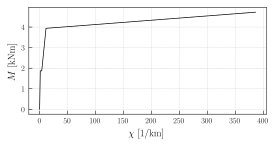

In [25]:
# | echo: false

My_qs_array = np.array([0, M_r.m, M_r.m, M_y.m, M_u.m]) * un.kNm
chi_qs_array_zuggurt = np.array([0, chi_r.m, (chi_y / M_y * M_r - Delta_chi).m, chi_y.m-Delta_chi.m, chi_u.m])/un.km

fig_M_chi, ax_M_chi = plt.subplots(figsize=(12/2.54, 5.4/2.54))
ax_M_chi.plot(chi_qs_array_zuggurt.to(1/un.km).m, My_qs_array.to(un.kNm).m, color="k")

# Scientific Notation if needed
apply_scientific_notation(ax_M_chi, chi_qs_array_zuggurt.m)

# Set axis labels
ax_M_chi.set_ylabel(r"$M$ [kNm]")
ax_M_chi.set_xlabel(r"$\chi$ [1/km]")

# Set limits
# ax_b500b.set_xlim(xmax=140 / 1000)
# ax_b500b.set_ylim(ymax=700)

# Show the plot
# plt.tight_layout()
plt.savefig("imgs/tho_M_chi.svg")
# plt.close()

![Momenten-Krümmungs-Beziehung des Querschnitts](../imgs/tho_M_chi.svg){#fig-tho_M_chi}

Vereinfacht setzt man die Momenten-Krümmungs-Beziehung in globaler X und Y Richtung an, sowie für positive und negative Biegebeanspruchungen.

In [26]:
varphi = (chi_qs_array_zuggurt * l_El/2).to(un.rad)
varphi = np.append(varphi, chi_u*l_El/2 * 1.3)


My_qs_array = np.append(My_qs_array, M_u)


# display(varphi, My_qs_array)

Anhand der Elementlänge $l_{El}$ kann die Verdrehung des Gelenks bestimmt werden. Zusammengefasst in der @fig-tho_biegung. Zudem ist ein ideal plastisches Verhalten modelliert, nach dem Erreichen der Bruchkrümmung.

In [27]:
# | echo: false

phi_qs_array = (chi_qs_array_zuggurt * l_El/2).to(un.rad)
phi_qs_array = np.append(phi_qs_array, chi_u*l_El/2 * 1.3)

fig_M_phi, ax_M_phi = plt.subplots(figsize=(12/2.54, 5.4/2.54))
ax_M_phi.plot(phi_qs_array.to(un.rad).m, My_qs_array.to(un.kNm).m, color="k")


# Set axis labels
ax_M_phi.set_ylabel(r"$M$ [kNm]")
ax_M_phi.set_xlabel(r"$\varphi$ [rad]")

# Set limits
# ax_b500b.set_xlim(xmax=140 / 1000)
# ax_b500b.set_ylim(ymax=700)

# Show the plot
# plt.tight_layout()
plt.savefig("imgs/tho_M_phi.svg")
plt.close()



![Momenten-Verdrehungs-Beziehung des Querschnitts](../imgs/tho_M_phi.svg){#fig-tho_M_phi}


#### Abbruchkriterium

Das Abbruchkriterium betrachtet die Summe der relativen Gelenkrotationen innerhalb der Länge des plastischen Gelenks gemäss der @eq-abbruchkriterium. Die Länge des plastischen Gelenks und die maximale plastische Rotation zeigen die folgenden Gleichungen.

In [28]:
# Annahme für die Länge des Gelenks
l_pl = 2 * d_apos
# Verformungsvermögen
varphi_max = (l_pl * chi_u).to(un.rad)

put_out(symbolic=True, rows = 1, precision = 3)

$$
\begin{aligned}
l_{pl}& = 2 \cdot {d}' = 350.0 \ \mathrm{mm} \\ 
\varphi_{max}& = l_{pl} \cdot \chi_{u} = 0.135 \ \mathrm{rad} \end{aligned}
$$

Die Definition des Abbruchkriteriums ist bei der Anwendung am Zweifeldträger in der @fig-jag_abbruchkrit illustriert.

#### Drillsteifigkeit

Das Torsionsträgheitsmoment für einen Rechteckquerschnitt approximiert:


![Rechteckquerschnitt mit der Breite des Rosts](../imgs/tho_drillsteif_qs.png)

In [29]:
I_x = (h * b_w**3 / 3 * (1 - 192*b_w/ (np.pi**5*h)*np.tanh(np.pi*h / (2*b_w)))).to(un.mm**4)

I_recht = (h**3 * b_w / 3 ).to(un.mm**4)

Delta_I = I_recht / I_x
put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
I_{x}& = \frac{h \cdot b_{w}^{3} \cdot \left(1 - \frac{192 \cdot b_{w} \cdot \tanh{\left(\frac{\pi \cdot h}{2 \cdot b_{w}} \right)}}{\pi^{5} \cdot h}\right)}{3} = 45830943.98 \ \mathrm{mm}^{4} \\ 
I_{recht}& = \frac{h^{3} \cdot b_{w}}{3} = 266666666.67 \ \mathrm{mm}^{4} \\ 
\Delta_{I}& = \frac{I_{recht}}{I_{x}} = 5.82 \  \end{aligned}
$$

Die ungerissene und gerissene Steifigkeit des Querschnitts wird folgend abgeschätzt:

In [30]:
nu = 0.2
G_c = E_c / (2*(1+nu))

GI = (I_x * G_c).to(un.kN*un.m**2)

put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
\nu& = 0.2 \\ 
G_{c}& = \frac{E_{c}}{2 \cdot \left(1 + \nu\right)} = 9.54 \ \frac{\mathrm{kN}}{\mathrm{mm}^{2}} \\ 
GI& = I_{x} \cdot G_{c} = 437.3 \ \mathrm{kN} \cdot \mathrm{m}^{2} \end{aligned}
$$

In [31]:
i_xy = h**3 / 6 

Gi_xy = i_xy * G_c
put_out(symbolic=True, rows = 1)

$$
\begin{aligned}
i_{xy}& = \frac{h^{3}}{6} = 1333333.33 \ \mathrm{mm}^{3} \\ 
Gi_{xy}& = i_{xy} \cdot G_{c} = 12722222.22 \ \mathrm{kN} \cdot \mathrm{mm} \end{aligned}
$$

In [32]:
l_El

M_r

<Quantity(1.87086263, 'kNm')>

In [33]:
chi_x_r = (M_r/b_w / Gi_xy).to(1/un.km)

varphi_x_r = (chi_x_r * l_El / 2).to(un.rad)
put_out(symbolic=True, precision = 10)

$$
\begin{aligned}
\chi_{x r}& = \frac{M_{r}}{b_{w} \cdot Gi_{xy}} = 1.4705470478 \ \frac{1}{\mathrm{km}} \quad & \varphi_{x r}& = \frac{\chi_{x r} \cdot l_{El}}{2} = 7.35274e-05 \ \mathrm{rad} \quad &  
 \end{aligned}
$$

Und die Steifigkeit des Gelenks beträgt abschliessend:

Als Vergleichswert hier die Plattensteifigkeit gemäss der Plattengleichung.

### Resultate

Die Ergebnisse der Berechnung sind hier gezeigt anhand des Last-Verformungs-Diagramms für die Stelle $V10$.

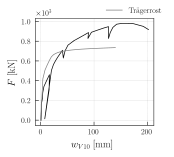

In [34]:
DF_rost_axis_V10 = pd.read_excel('calc/axis_res.xlsx', sheet_name='V10')
DF_rost_axis_V10['eZ_1 [mm]']= -1*DF_rost_axis_V10['eZ_1 [mm]']

DF_rost_axis_V10_fein = pd.read_excel('calc/axis_res.xlsx', sheet_name='V10_fein')
DF_rost_axis_V10_fein['eZ_1 [mm]']= -1*DF_rost_axis_V10_fein['eZ_1 [mm]']

DF_rost_axis_V10_ohne_zuggurt = pd.read_excel('calc/axis_res.xlsx', sheet_name='V10_ohne_zuggurt')
DF_rost_axis_V10_ohne_zuggurt['eZ_1 [mm]']= -1*DF_rost_axis_V10_ohne_zuggurt['eZ_1 [mm]']

DF_rost_axis_V10_drillweich = pd.read_excel('calc/axis_res.xlsx', sheet_name='V10_drillweich')
DF_rost_axis_V10_drillweich['eZ_1 [mm]']= -1*DF_rost_axis_V10_drillweich['eZ_1 [mm]']

DF_rost_axis_V10_modelliert = pd.read_excel('calc/axis_res.xlsx', sheet_name='V10_axis')
DF_rost_axis_V10_modelliert['eZ_1 [mm]']= -1*DF_rost_axis_V10_modelliert['eZ_1 [mm]']

DF_rost_axis_V10_2x_drill = pd.read_excel('calc/axis_res.xlsx', sheet_name='V10_2x_drill')
DF_rost_axis_V10_2x_drill['eZ_1 [mm]']= -1*DF_rost_axis_V10_2x_drill['eZ_1 [mm]']


ax_res_V10.plot(DF_rost_axis_V10.iloc[:,1],  DF_rost_axis_V10.iloc[:,2]*Q_u.to(un.kN).m*12, label='Trägerrost', color='gray')
 
fig_res_V10.legend()
fig_res_V10.savefig("imgs/tho_res_V10_calc.svg")
# plt.close()
fig_res_V10

![Modellergebnisse, Last-Verformungs-Diagramm an der Stelle $V10$](../imgs/tho_res_V10_calc.svg){#fig-tho_res_V10_calc}

### Drillsteifigkeit 

#### Ungerissene Drillsteifigkeit



In [35]:
t_sup = 2 * c_nom + diam_s
t_inf = t_sup

d_v = h - (t_sup + t_inf) / 2

G_c

tau_xy_I = f_ct

m_xy_I = (d_v * tau_xy_I * t_sup).to(un.kNm/un.m)


gamma_xy_I_sup = (tau_xy_I / G_c).to(un.rad)
gamma_xy_I_inf = gamma_xy_I_sup



put_out(symbolic=True, rows = 1, precision=4)


$$
\begin{aligned}
t_{sup}& = 2 \cdot c_{nom} + \oslash_{s} = 50 \ \mathrm{mm} \\ 
t_{inf}& = t_{sup} = 50 \ \mathrm{mm} \\ 
d_{v}& = h - \frac{t_{sup} + t_{inf}}{2} = 150.0 \ \mathrm{mm} \\ 
G_{c}& = \frac{E_{c}}{2 \cdot \left(1 + \nu\right)} = 9.5417 \ \frac{\mathrm{kN}}{\mathrm{mm}^{2}} \\ 
\tau_{xy I}& = f_{ct} = 2.8063 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
m_{xy I}& = d_{v} \cdot \tau_{xy I} \cdot t_{sup} = 21.0472 \ \frac{\mathrm{kNm}}{\mathrm{m}} \\ 
\gamma_{xy I sup}& = \frac{\tau_{xy I}}{G_{c}} = 0.0003 \ \mathrm{rad} \\ 
\gamma_{xy I inf}& = \gamma_{xy I sup} = 0.0003 \ \mathrm{rad} \end{aligned}
$$

Umrechnung auf Stabsystem in Momenten-Verdrehungsbeziehung:

In [36]:
chi_I =  ((gamma_xy_I_inf + gamma_xy_I_sup) / d_v).to(1/un.km)
varphi_I = (chi_I * l_El).to(un.rad)

#Faktor zwei da Stab zu Drillsteifigkeit
GK_I = (m_xy_I / chi_I * (1*b_w * 2) / l_El).to(un.kNm/un.rad)

put_out(symbolic=True, rows = 1, precision=4, evaluate=True)

$$
\begin{aligned}
\chi_{I}& = \frac{\gamma_{xy I inf} + \gamma_{xy I sup}}{d_{v}} = 3.9215 \ \frac{1}{\mathrm{km}} \\ 
\varphi_{I}& = \chi_{I} \cdot l_{El} = 0.0004 \ \mathrm{rad} \\ 
GK_{I}& = \frac{2 \cdot b_{w} \cdot m_{xy I}}{\chi_{I} \cdot l_{El}} = 10734.375 \ \frac{\mathrm{kNm}}{\mathrm{rad}} \end{aligned}
$$

In [37]:
l_El
l_Einzug = l_El / 2

k_r_com_x = (G_c * h**3 * b_w / 6 / l_Einzug).to(un.kNm/un.rad)

put_out(symbolic=True)

$$
\begin{aligned}
l_{El}& = 0.1 \ \mathrm{m} \quad & l_{Einzug}& = \frac{l_{El}}{2} = 0.05 \ \mathrm{m} \quad & k_{r , x}& = \frac{G_{c} \cdot h^{3} \cdot b_{w}}{6 \cdot l_{Einzug}} = 25444.44 \ \frac{\mathrm{kNm}}{\mathrm{rad}} \end{aligned}
$$

### Gerissene Drillsteifigkeit

In [38]:
m_xy_II = 50*un.kNm/un.m

n = E_s / E_c
A_c = (h * b_w).to(un.mm**2)
A_s = a_s *b_w
rho_x = (A_s / A_c).to(un.percent)
rho_y = rho_x

tau_xy_y = (m_xy_II / (d_v*t_inf)).to(un.N/un.mm**2)

f_sy

gamma_xy_II_sup = 2*(tau_xy_y / E_s *(np.sqrt((1+n *rho_x) *(1+n*rho_y)/(rho_x*rho_y)) + n)).to(un.rad)
gamma_xy_II_inf = gamma_xy_II_sup

put_out(symbolic=True, rows = 1, precision=4)


$$
\begin{aligned}
m_{xy II}& = 50.0 \ \frac{\mathrm{kNm}}{\mathrm{m}} \\ 
n& = \frac{E_{s}}{E_{c}} = 8.5808 \  \\ 
A_{c}& = h \cdot b_{w} = 20000.0 \ \mathrm{mm}^{2} \\ 
A_{s}& = a_{s} \cdot b_{w} = 52.3599 \ \mathrm{mm}^{2} \\ 
\rho_{x}& = \frac{A_{s}}{A_{c}} = 0.2618 \ \mathrm{\%} \\ 
\rho_{y}& = \rho_{x} = 0.2618 \ \mathrm{\%} \\ 
\tau_{xy y}& = \frac{m_{xy II}}{d_{v} \cdot t_{inf}} = 6.6667 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
f_{sy}& = 445.6 \ \frac{\mathrm{N}}{\mathrm{mm}^{2}} \\ 
\gamma_{xy II sup}& = \frac{2 \cdot \tau_{xy y} \cdot \left(\sqrt{\frac{\left(1 + n \cdot \rho_{x}\right) \cdot \left(1 + n \cdot \rho_{y}\right)}{\rho_{x} \cdot \rho_{y}}} + n\right)}{E_{s}} = 0.0271 \ \mathrm{rad} \\ 
\gamma_{xy II inf}& = \gamma_{xy II sup} = 0.0271 \ \mathrm{rad} \end{aligned}
$$

In [39]:
chi_II =  ((gamma_xy_II_sup + gamma_xy_II_inf) / d_v).to(1/un.m)


#Faktor zwei da Stab zu Drillsteifigkeit
GK_II = (m_xy_II / chi_II * (1 * b_w * 2 / l_El)).to(un.kNm/un.rad)

put_out(symbolic=True, rows = 1, precision=4)

$$
\begin{aligned}
\chi_{II}& = \frac{\gamma_{xy II sup} + \gamma_{xy II inf}}{d_{v}} = 0.3611 \ \frac{1}{\mathrm{m}} \\ 
GK_{II}& = m_{xy II} \cdot \frac{1}{\chi_{II}} \cdot 1 \cdot b_{w} \cdot 2 \cdot \frac{1}{l_{El}} = 276.9281 \ \frac{\mathrm{kNm}}{\mathrm{rad}} \end{aligned}
$$

c:\Users\Pascal Gitz\miniconda3\envs\calc\Lib\site-packages\matplotlib\cbook.py:1398: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


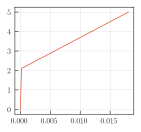

In [40]:

M_x_I = b_w * m_xy_I
M_x_II = b_w * m_xy_II
varphi_I = M_x_I / GK_I
varphi_II = M_x_II / GK_II



M_x_array = np.array([0, M_x_I.m, M_x_II.m])*un.kNm
phi_x_array = np.array([0, varphi_I.m, varphi_II.m])*un.rad

plt.plot(phi_x_array, M_x_array )

## Fazit